In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Mohtat2020)
param = pybamm.LithiumIonParameters()
Cn = parameter_values.evaluate(param.C_n_init)
Cp = parameter_values.evaluate(param.C_p_init)
n_Li_init = parameter_values.evaluate(param.n_Li_particles_init)
c_n_max = parameter_values.evaluate(param.c_n_max)
c_p_max = parameter_values.evaluate(param.c_p_max)
Cn

5.973262521249683

## Initialize model at full charge to 4.1V

In [3]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)
parameter_values.update({
    "SEI kinetic rate constant [m.s-1]": 1e-15,
    "SEI resistivity [Ohm.m]": 0,
})
spm = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})

In [4]:
esoh_model = pybamm.lithium_ion.ElectrodeSOH()
esoh_sim = pybamm.Simulation(esoh_model, parameter_values=parameter_values)
param = spm.param

Vmin = 2.5
Vmax = 4.2
Cn = parameter_values.evaluate(param.C_n_init)
Cp = parameter_values.evaluate(param.C_p_init)
n_Li_init = parameter_values.evaluate(param.n_Li_particles_init)
c_n_max = parameter_values.evaluate(param.c_n_max)
c_p_max = parameter_values.evaluate(param.c_p_max)

esoh_sol = esoh_sim.solve(
    [0],
    inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li_init},
)
print(esoh_sol["x_100"].data[0])
print(esoh_sol["y_100"].data[0])

0.904538880886973
0.26790222708570915


## One cycle

In [5]:
parameter_values.update(
    {
        "Initial concentration in negative electrode [mol.m-3]": esoh_sol["x_100"].data[0] * c_n_max,
        "Initial concentration in positive electrode [mol.m-3]": esoh_sol["y_100"].data[0] * c_p_max,
    }
)
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol = sim.solve()

In [6]:
spm_sol.plot(["Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3.6147638074320043, step=0.03614763807432004…

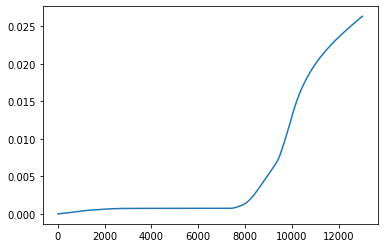

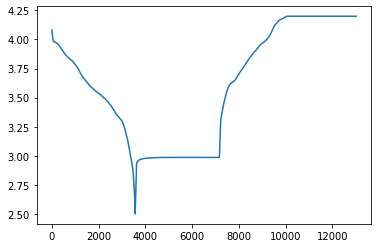

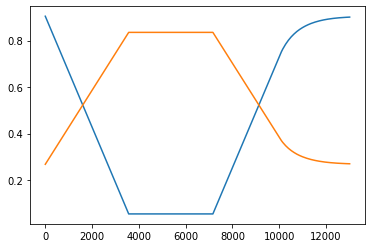

In [7]:
plt.plot(spm_sol["Time [s]"].data, spm_sol["Loss of Lithium Inventory [%]"].data)
plt.figure()
plt.plot(spm_sol["Time [s]"].data, spm_sol["Terminal voltage [V]"].data)
plt.figure()
plt.plot(spm_sol["Time [s]"].data, spm_sol["Negative electrode SOC"].data)
plt.plot(spm_sol["Time [s]"].data, spm_sol["Positive electrode SOC"].data)

In [8]:
lli = spm_sol["Loss of Lithium Inventory [%]"].data
lli_one_cycle = lli[-1] - lli[0]

## 10 cycles

In [26]:
pybamm.set_logging_level("NOTICE")
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
    f"Charge at 1C until {Vmax}V", 
    f"Hold at {Vmax}V until C/50")
] * 183)
spm = pybamm.lithium_ion.SPM()
sim_100 = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol_100 = sim_100.solve()

2021-02-27 00:46:16,661 - [NOTICE] simulation.solve(691): Cycle 1/183 (27.155 ms elapsed) --------------------
2021-02-27 00:46:16,662 - [NOTICE] simulation.solve(721): Cycle 1/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:16,837 - [NOTICE] simulation.solve(721): Cycle 1/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:16,991 - [NOTICE] simulation.solve(721): Cycle 1/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:17,118 - [NOTICE] simulation.solve(721): Cycle 1/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:46:17,327 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:17,480 - [NOTICE] simulation.solve(691): Cycle 2/183 (846.117 ms elapsed) --------------------
2021-02-27 00:46:17,481 - [NOTICE] simulation.solve(721): Cycle 2/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:17,657 - [NOTICE] simulation.solve(721): Cycle 2/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:17,805 - [NOTICE] simulation.solve(721): Cycle 2/183, step 3/4: Charg

2021-02-27 00:46:25,594 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:25,626 - [NOTICE] simulation.solve(691): Cycle 15/183 (8.992 s elapsed) --------------------
2021-02-27 00:46:25,626 - [NOTICE] simulation.solve(721): Cycle 15/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:25,786 - [NOTICE] simulation.solve(721): Cycle 15/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:25,914 - [NOTICE] simulation.solve(721): Cycle 15/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:26,038 - [NOTICE] simulation.solve(721): Cycle 15/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:46:26,203 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:26,233 - [NOTICE] simulation.solve(691): Cycle 16/183 (9.599 s elapsed) --------------------
2021-02-27 00:46:26,234 - [NOTICE] simulation.solve(721): Cycle 16/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:26,392 - [NOTICE] simulation.solve(721): Cycle 16/183, step 2/4: Rest for 1 hour
2021-02-27 0

2021-02-27 00:46:34,031 - [NOTICE] simulation.solve(721): Cycle 28/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:34,158 - [NOTICE] simulation.solve(721): Cycle 28/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:46:34,312 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:34,343 - [NOTICE] simulation.solve(691): Cycle 29/183 (17.708 s elapsed) --------------------
2021-02-27 00:46:34,343 - [NOTICE] simulation.solve(721): Cycle 29/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:34,488 - [NOTICE] simulation.solve(721): Cycle 29/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:34,613 - [NOTICE] simulation.solve(721): Cycle 29/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:34,736 - [NOTICE] simulation.solve(721): Cycle 29/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:46:34,899 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:34,928 - [NOTICE] simulation.solve(691): Cycle 30/183 (18.294 s elapsed) --------------------
2021-

2021-02-27 00:46:42,533 - [NOTICE] simulation.solve(721): Cycle 42/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:42,688 - [NOTICE] simulation.solve(721): Cycle 42/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:42,823 - [NOTICE] simulation.solve(721): Cycle 42/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:42,936 - [NOTICE] simulation.solve(721): Cycle 42/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:46:43,094 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:43,120 - [NOTICE] simulation.solve(691): Cycle 43/183 (26.485 s elapsed) --------------------
2021-02-27 00:46:43,121 - [NOTICE] simulation.solve(721): Cycle 43/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:43,267 - [NOTICE] simulation.solve(721): Cycle 43/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:43,412 - [NOTICE] simulation.solve(721): Cycle 43/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:43,532 - [NOTICE] simulation.solve(721): Cycle 43/183, step 4/4: Hold

2021-02-27 00:46:51,905 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:51,938 - [NOTICE] simulation.solve(691): Cycle 56/183 (35.303 s elapsed) --------------------
2021-02-27 00:46:51,938 - [NOTICE] simulation.solve(721): Cycle 56/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:52,102 - [NOTICE] simulation.solve(721): Cycle 56/183, step 2/4: Rest for 1 hour
2021-02-27 00:46:52,235 - [NOTICE] simulation.solve(721): Cycle 56/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:46:52,358 - [NOTICE] simulation.solve(721): Cycle 56/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:46:52,543 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:46:52,578 - [NOTICE] simulation.solve(691): Cycle 57/183 (35.943 s elapsed) --------------------
2021-02-27 00:46:52,579 - [NOTICE] simulation.solve(721): Cycle 57/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:46:52,736 - [NOTICE] simulation.solve(721): Cycle 57/183, step 2/4: Rest for 1 hour
2021-02-27

2021-02-27 00:47:00,595 - [NOTICE] simulation.solve(721): Cycle 69/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:00,736 - [NOTICE] simulation.solve(721): Cycle 69/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:00,900 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:00,934 - [NOTICE] simulation.solve(691): Cycle 70/183 (44.299 s elapsed) --------------------
2021-02-27 00:47:00,935 - [NOTICE] simulation.solve(721): Cycle 70/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:01,098 - [NOTICE] simulation.solve(721): Cycle 70/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:01,222 - [NOTICE] simulation.solve(721): Cycle 70/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:01,346 - [NOTICE] simulation.solve(721): Cycle 70/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:01,506 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:01,540 - [NOTICE] simulation.solve(691): Cycle 71/183 (44.905 s elapsed) --------------------
2021-

2021-02-27 00:47:09,286 - [NOTICE] simulation.solve(721): Cycle 83/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:09,444 - [NOTICE] simulation.solve(721): Cycle 83/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:09,577 - [NOTICE] simulation.solve(721): Cycle 83/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:09,708 - [NOTICE] simulation.solve(721): Cycle 83/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:09,915 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:09,949 - [NOTICE] simulation.solve(691): Cycle 84/183 (53.314 s elapsed) --------------------
2021-02-27 00:47:09,950 - [NOTICE] simulation.solve(721): Cycle 84/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:10,093 - [NOTICE] simulation.solve(721): Cycle 84/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:10,233 - [NOTICE] simulation.solve(721): Cycle 84/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:10,374 - [NOTICE] simulation.solve(721): Cycle 84/183, step 4/4: Hold

2021-02-27 00:47:18,714 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:18,748 - [NOTICE] simulation.solve(691): Cycle 97/183 (1 minute, 2 seconds elapsed) --------------------
2021-02-27 00:47:18,749 - [NOTICE] simulation.solve(721): Cycle 97/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:18,887 - [NOTICE] simulation.solve(721): Cycle 97/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:19,021 - [NOTICE] simulation.solve(721): Cycle 97/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:19,138 - [NOTICE] simulation.solve(721): Cycle 97/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:19,308 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:19,343 - [NOTICE] simulation.solve(691): Cycle 98/183 (1 minute, 3 seconds elapsed) --------------------
2021-02-27 00:47:19,344 - [NOTICE] simulation.solve(721): Cycle 98/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:19,507 - [NOTICE] simulation.solve(721): Cycle 98/183, step 2/4: Rest

2021-02-27 00:47:27,580 - [NOTICE] simulation.solve(721): Cycle 110/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:27,765 - [NOTICE] simulation.solve(721): Cycle 110/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:27,927 - [NOTICE] simulation.solve(721): Cycle 110/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:28,063 - [NOTICE] simulation.solve(721): Cycle 110/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:28,259 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:28,295 - [NOTICE] simulation.solve(691): Cycle 111/183 (1 minute, 12 seconds elapsed) --------------------
2021-02-27 00:47:28,296 - [NOTICE] simulation.solve(721): Cycle 111/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:28,454 - [NOTICE] simulation.solve(721): Cycle 111/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:28,614 - [NOTICE] simulation.solve(721): Cycle 111/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:28,751 - [NOTICE] simulation.solve(721): Cycle 11

2021-02-27 00:47:36,459 - [NOTICE] simulation.solve(721): Cycle 123/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:36,585 - [NOTICE] simulation.solve(721): Cycle 123/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:36,767 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:36,801 - [NOTICE] simulation.solve(691): Cycle 124/183 (1 minute, 20 seconds elapsed) --------------------
2021-02-27 00:47:36,801 - [NOTICE] simulation.solve(721): Cycle 124/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:36,949 - [NOTICE] simulation.solve(721): Cycle 124/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:37,094 - [NOTICE] simulation.solve(721): Cycle 124/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:37,215 - [NOTICE] simulation.solve(721): Cycle 124/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:37,395 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:37,432 - [NOTICE] simulation.solve(691): Cycle 125/183 (1 minute, 21 seconds ela

2021-02-27 00:47:46,058 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:46,096 - [NOTICE] simulation.solve(691): Cycle 137/183 (1 minute, 29 seconds elapsed) --------------------
2021-02-27 00:47:46,097 - [NOTICE] simulation.solve(721): Cycle 137/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:46,256 - [NOTICE] simulation.solve(721): Cycle 137/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:46,405 - [NOTICE] simulation.solve(721): Cycle 137/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:46,527 - [NOTICE] simulation.solve(721): Cycle 137/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:46,734 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:46,779 - [NOTICE] simulation.solve(691): Cycle 138/183 (1 minute, 30 seconds elapsed) --------------------
2021-02-27 00:47:46,780 - [NOTICE] simulation.solve(721): Cycle 138/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:46,959 - [NOTICE] simulation.solve(721): Cycle 138/183, step

2021-02-27 00:47:54,968 - [NOTICE] simulation.solve(721): Cycle 150/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:55,135 - [NOTICE] simulation.solve(721): Cycle 150/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:55,284 - [NOTICE] simulation.solve(721): Cycle 150/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:55,400 - [NOTICE] simulation.solve(721): Cycle 150/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:47:55,586 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:47:55,620 - [NOTICE] simulation.solve(691): Cycle 151/183 (1 minute, 39 seconds elapsed) --------------------
2021-02-27 00:47:55,621 - [NOTICE] simulation.solve(721): Cycle 151/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:47:55,775 - [NOTICE] simulation.solve(721): Cycle 151/183, step 2/4: Rest for 1 hour
2021-02-27 00:47:55,923 - [NOTICE] simulation.solve(721): Cycle 151/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:47:56,056 - [NOTICE] simulation.solve(721): Cycle 15

2021-02-27 00:48:04,229 - [NOTICE] simulation.solve(721): Cycle 163/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:48:04,404 - [NOTICE] simulation.solve(721): Cycle 163/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:48:04,631 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:48:04,675 - [NOTICE] simulation.solve(691): Cycle 164/183 (1 minute, 48 seconds elapsed) --------------------
2021-02-27 00:48:04,676 - [NOTICE] simulation.solve(721): Cycle 164/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:48:04,857 - [NOTICE] simulation.solve(721): Cycle 164/183, step 2/4: Rest for 1 hour
2021-02-27 00:48:05,022 - [NOTICE] simulation.solve(721): Cycle 164/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:48:05,159 - [NOTICE] simulation.solve(721): Cycle 164/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:48:05,381 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:48:05,418 - [NOTICE] simulation.solve(691): Cycle 165/183 (1 minute, 49 seconds ela

2021-02-27 00:48:13,646 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:48:13,691 - [NOTICE] simulation.solve(691): Cycle 177/183 (1 minute, 57 seconds elapsed) --------------------
2021-02-27 00:48:13,692 - [NOTICE] simulation.solve(721): Cycle 177/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:48:13,893 - [NOTICE] simulation.solve(721): Cycle 177/183, step 2/4: Rest for 1 hour
2021-02-27 00:48:14,069 - [NOTICE] simulation.solve(721): Cycle 177/183, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:48:14,225 - [NOTICE] simulation.solve(721): Cycle 177/183, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:48:14,448 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:48:14,487 - [NOTICE] simulation.solve(691): Cycle 178/183 (1 minute, 58 seconds elapsed) --------------------
2021-02-27 00:48:14,487 - [NOTICE] simulation.solve(721): Cycle 178/183, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:48:14,664 - [NOTICE] simulation.solve(721): Cycle 178/183, step

In [10]:
len(spm_sol_100.cycles)

183

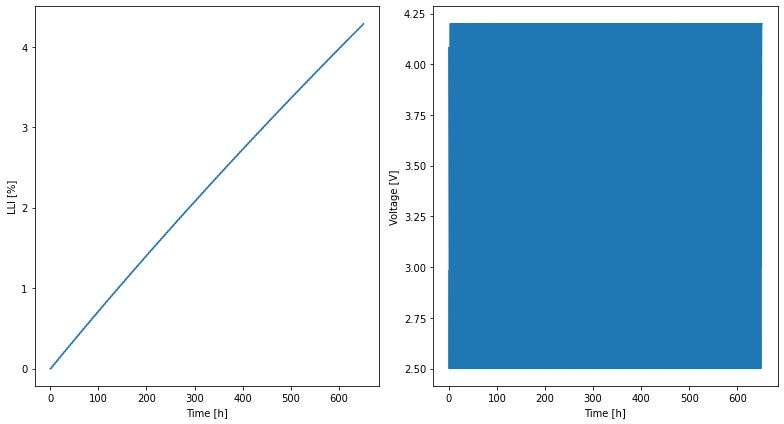

In [11]:
fig, ax = plt.subplots(1,2,figsize=(11,6))

ax[0].plot(spm_sol_100["Time [h]"].data, spm_sol_100["Loss of Lithium Inventory [%]"].data)
ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")
ax[1].plot(spm_sol_100["Time [h]"].data, spm_sol_100["Terminal voltage [V]"].data)
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

fig.tight_layout()
OUTPUT_DIR = "/Users/vsulzer/Google Drive/PCL_Sulzer/"
fig.savefig(OUTPUT_DIR + "100_cycles.eps", dpi=1000)

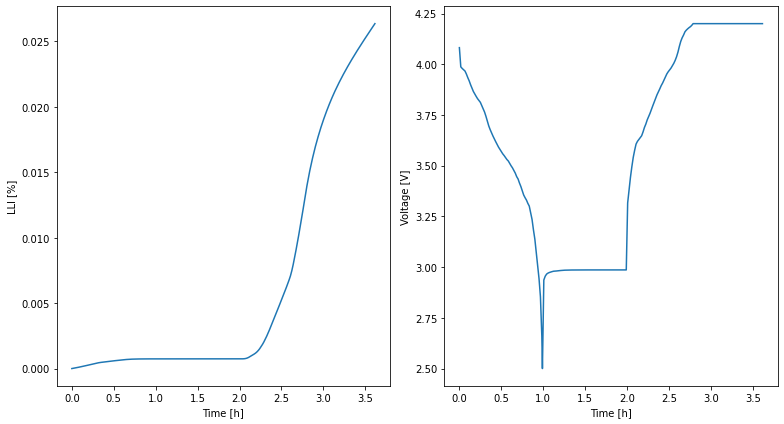

In [12]:
fig, ax = plt.subplots(1,2,figsize=(11,6))

ax[0].plot(spm_sol_100.cycles[0]["Time [h]"].data, spm_sol_100.cycles[0]["Loss of Lithium Inventory [%]"].data)
ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")
ax[1].plot(spm_sol_100.cycles[0]["Time [h]"].data, spm_sol_100.cycles[0]["Terminal voltage [V]"].data)
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

fig.tight_layout()
fig.savefig(OUTPUT_DIR + "first_cycle.eps", dpi=1000)

In [13]:
lli_100 = spm_sol_100["Loss of Lithium Inventory [%]"].data
lli_100_cycles = lli_100[-1] - lli_100[0]

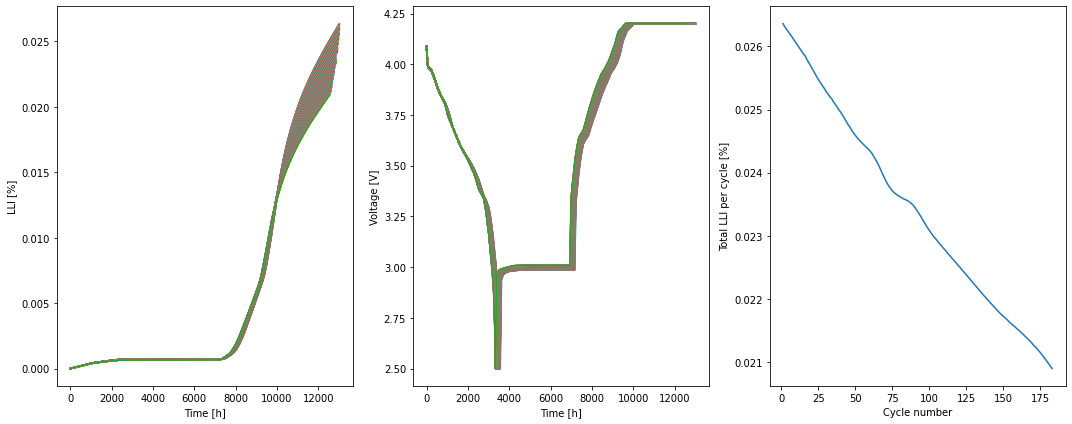

In [14]:

fig, ax = plt.subplots(1,3,figsize=(15,6))

all_lli = []
for cycle in spm_sol_100.cycles:
    t = cycle["Time [s]"].data
    lli = cycle["Loss of Lithium Inventory [%]"].data
    V = cycle["Terminal voltage [V]"].data

    ax[0].plot(t - t[0], lli-lli[0])
    ax[1].plot(t-t[0], V)
    
    all_lli.append(lli[-1]-lli[0])

ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")    
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

ax[2].plot(range(1, len(all_lli)+1), all_lli)
ax[2].set_xlabel("Cycle number")
ax[2].set_ylabel("Total LLI per cycle [%]")

fig.tight_layout()
fig.savefig(OUTPUT_DIR + "cycles_comparison.eps", dpi=1000)

### eSOH parameters


In [15]:
len(spm_sol_100.summary_variables.items())

71

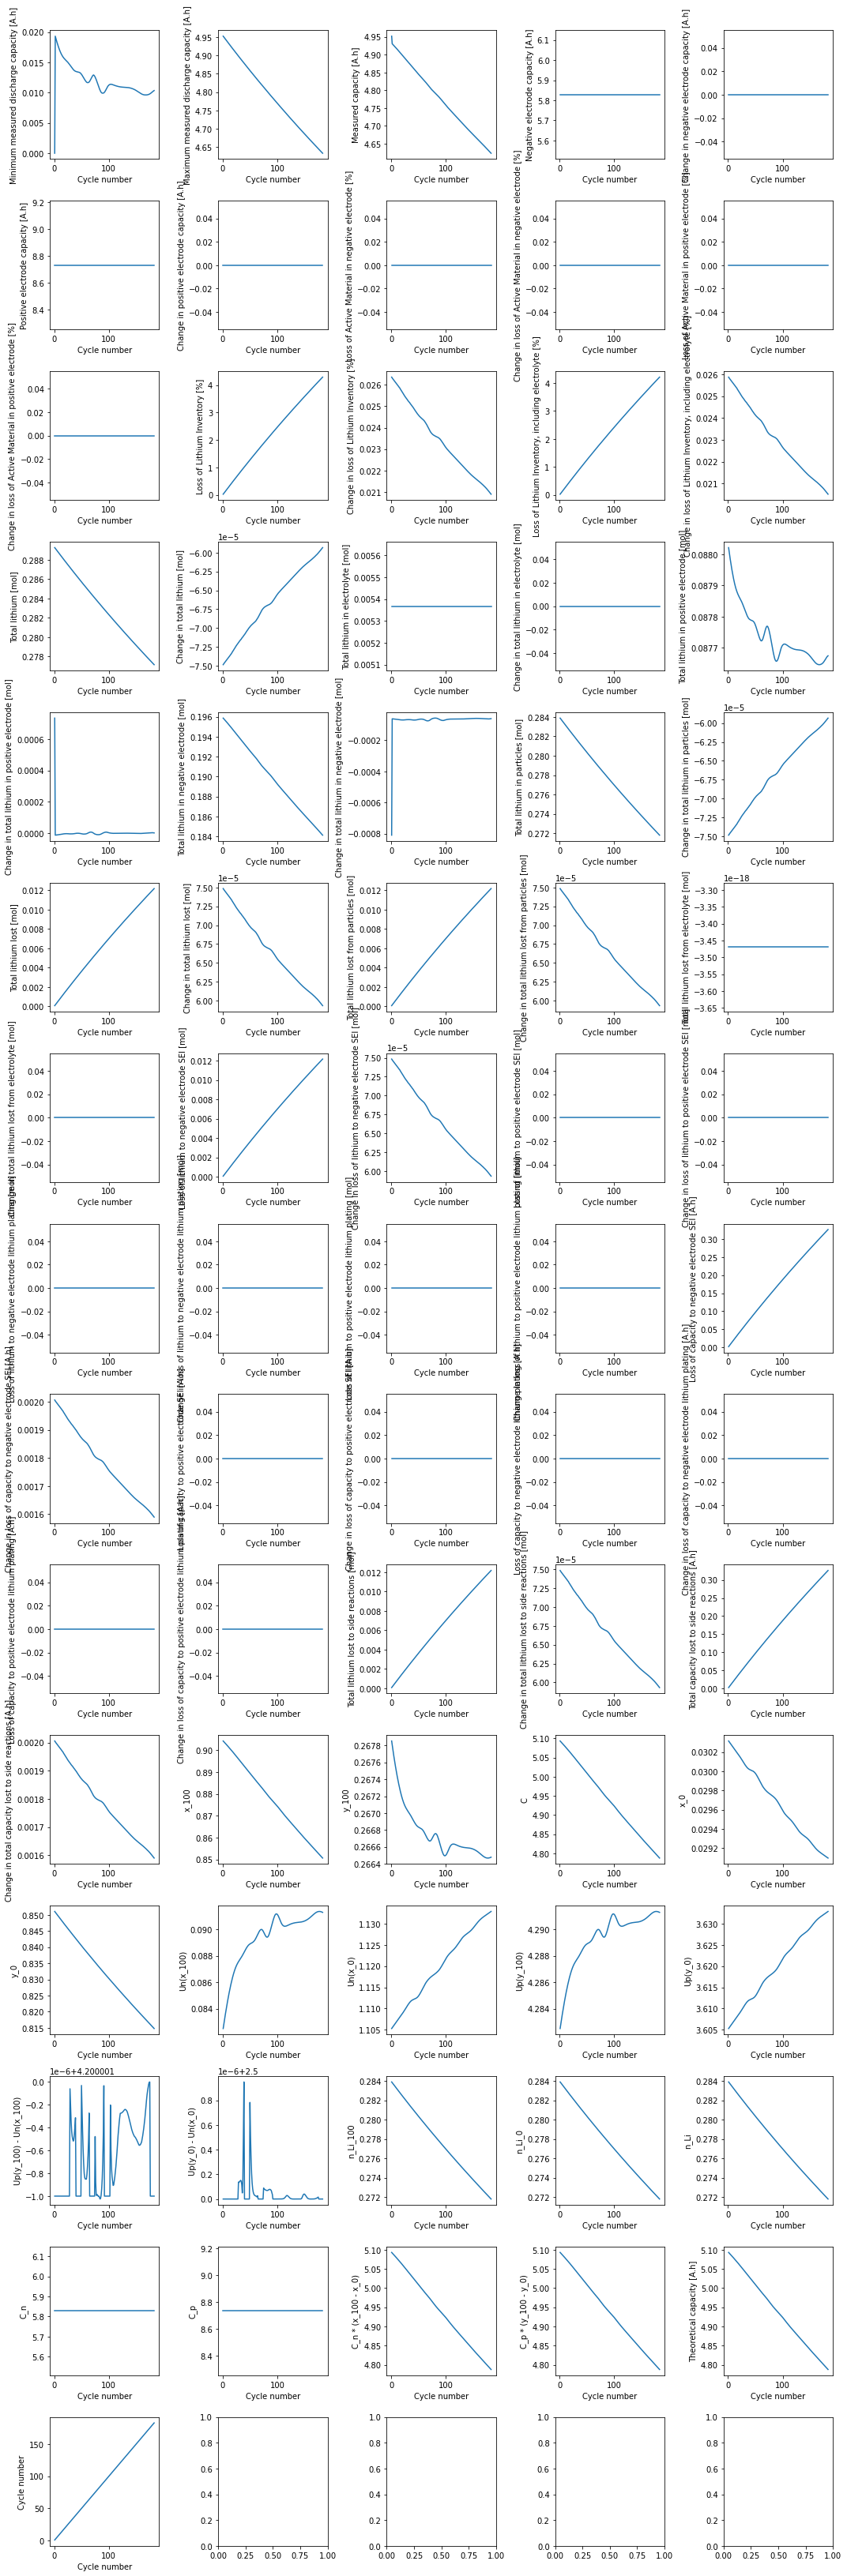

In [16]:
fig, axes = plt.subplots(15,5,figsize=(15,45))

for k, (name,val) in enumerate(spm_sol_100.summary_variables.items()):
    ax = axes.flat[k]
    ax.plot(spm_sol_100.summary_variables["Cycle number"],val)
    ax.set_xlabel("Cycle number")
    ax.set_ylabel(name)

# axes.flat[4].plot(range(1,101), all_nLi)
# axes.flat[4].set_xlabel("Cycle number")
# axes.flat[4].set_ylabel("n_Li")
# axes.flat[-1].plot(range(1,101), all_C)
# axes.flat[-1].set_xlabel("Cycle number")
# axes.flat[-1].set_ylabel("C")
# axes.flat[-1].set_ylim([2,5])
# axes.flat[-2].set_ylim([2,5])

fig.tight_layout()

## Accelerated simulations algorithm

### Constant extrapolation

Solve for 1 cycle

In [17]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol = sim.solve()

2021-02-27 00:39:56,235 - [NOTICE] simulation.solve(691): Cycle 1/1 (28.252 ms elapsed) --------------------
2021-02-27 00:39:56,235 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:39:56,466 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:39:56,652 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:39:56,825 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:39:57,115 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:39:57,256 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 1.049 s


Check how well extrapolating 1 cycle does

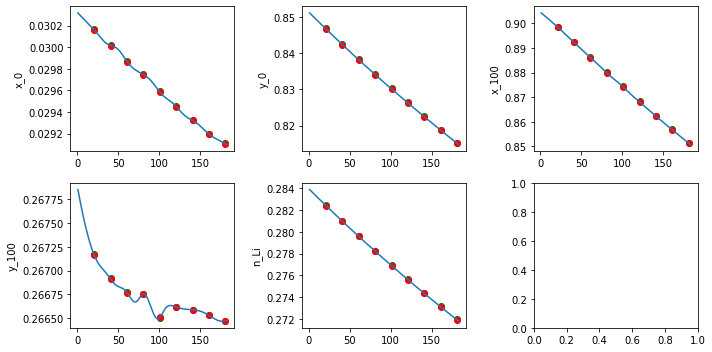

In [18]:
n_cycles_step = 20
cycle = 0

esoh_vars = ["x_0", "y_0", "x_100", "y_100", "n_Li"]

fig, ax = plt.subplots(2,3,figsize=(10,5))
for k, name in enumerate(esoh_vars):
    ax.flat[k].plot(spm_sol_100.summary_variables["Cycle number"], spm_sol_100.summary_variables[name])
    ax.flat[k].set_ylabel(name)

while cycle < len(spm_sol_100.cycles)-n_cycles_step:
    n_Li_cycle = spm_sol_100.cycles[cycle]["Total lithium in particles [mol]"].data
    n_Li_cycle_init = n_Li_cycle[0]
    delta_nLi_cycle = n_Li_cycle[0] - n_Li_cycle[-1]
    
    n_Li = n_Li_cycle_init - delta_nLi_cycle * n_cycles_step

    esoh_sol = esoh_sim.solve(
        [0],
        inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li},
    )
    esoh_sim.built_model.set_initial_conditions_from(esoh_sol)
    
    cycle += n_cycles_step
    for k, name in enumerate(esoh_vars):
        ax.flat[k].scatter(cycle+1,esoh_sol[name].data[0],color="g")
        ax.flat[k].scatter(cycle+1,spm_sol_100.summary_variables[name][cycle],color="r")
        
fig.tight_layout()

Use extrapolation to initialize next simulation

In [23]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])

sim_acc = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sol_acc = []
cycle_nums = []
cycle = 0
while cycle < 183:
    print(cycle)
    # Simulate one cycle
    sol = sim_acc.solve()
    
    n_Li_cycle = sol["Total lithium in particles [mol]"].data
    n_Li_cycle_init = n_Li_cycle[0]
    delta_nLi_cycle = n_Li_cycle[0] - n_Li_cycle[-1]
    
    n_Li = n_Li_cycle_init - delta_nLi_cycle * n_cycles_step

    esoh_sol = esoh_sim.solve(
        [0],
        inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li},
    )
    esoh_sim.built_model.set_initial_conditions_from(esoh_sol)
    ics = {}
    x_100 = esoh_sol["x_100"].data[0]
    y_100 = esoh_sol["y_100"].data[0]
    for var in sol.all_models[0].initial_conditions:
        if var.name == "X-averaged negative particle concentration":
            ics[var.name] = x_100 * np.ones((sol.all_models[0].variables[var.name].size, 2))
        elif var.name == "X-averaged positive particle concentration":
            ics[var.name] = y_100 * np.ones((sol.all_models[0].variables[var.name].size, 2))
        else:
            ics[var.name] = sim_acc.solution[var.name].data
    sim_acc.op_conds_to_built_models[experiment.operating_conditions[0][:2]].set_initial_conditions_from(ics)

    cycle_nums.append(cycle)
    sol_acc.append(sol)
    cycle += n_cycles_step
        
fig.tight_layout()

0


2021-02-27 00:43:34,017 - [NOTICE] simulation.solve(691): Cycle 1/1 (21.833 ms elapsed) --------------------
2021-02-27 00:43:34,017 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:43:34,216 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:34,381 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:34,553 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:34,818 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:34,959 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 964.477 ms
2021-02-27 00:43:35,018 - [NOTICE] simulation.solve(691): Cycle 1/1 (24.972 ms elapsed) --------------------
2021-02-27 00:43:35,019 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V


20


2021-02-27 00:43:35,219 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:35,403 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:35,561 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:35,775 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:35,895 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 902.440 ms
2021-02-27 00:43:35,952 - [NOTICE] simulation.solve(691): Cycle 1/1 (26.423 ms elapsed) --------------------
2021-02-27 00:43:35,953 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V


40


2021-02-27 00:43:36,152 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:36,331 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:36,475 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:36,724 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:36,851 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 925.040 ms
2021-02-27 00:43:36,912 - [NOTICE] simulation.solve(691): Cycle 1/1 (28.036 ms elapsed) --------------------
2021-02-27 00:43:36,913 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V


60


2021-02-27 00:43:37,129 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:37,298 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:37,462 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:37,744 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:37,872 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 988.338 ms
2021-02-27 00:43:37,941 - [NOTICE] simulation.solve(691): Cycle 1/1 (32.080 ms elapsed) --------------------
2021-02-27 00:43:37,942 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:43:38,127 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour


80


2021-02-27 00:43:38,313 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:38,481 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:38,751 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:38,870 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 960.670 ms
2021-02-27 00:43:38,929 - [NOTICE] simulation.solve(691): Cycle 1/1 (25.572 ms elapsed) --------------------
2021-02-27 00:43:38,929 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:43:39,113 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:39,297 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V


100


2021-02-27 00:43:39,441 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:39,657 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:39,779 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 876.300 ms
2021-02-27 00:43:39,832 - [NOTICE] simulation.solve(691): Cycle 1/1 (23.941 ms elapsed) --------------------
2021-02-27 00:43:39,833 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:43:40,016 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:40,177 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V


120


2021-02-27 00:43:40,328 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:40,556 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:40,673 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 864.539 ms
2021-02-27 00:43:40,729 - [NOTICE] simulation.solve(691): Cycle 1/1 (25.695 ms elapsed) --------------------
2021-02-27 00:43:40,729 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V


140


2021-02-27 00:43:40,922 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:41,082 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:41,232 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:41,479 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:41,598 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 895.335 ms
2021-02-27 00:43:41,661 - [NOTICE] simulation.solve(691): Cycle 1/1 (27.544 ms elapsed) --------------------
2021-02-27 00:43:41,661 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V


160


2021-02-27 00:43:41,853 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour
2021-02-27 00:43:42,024 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:42,169 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:42,386 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:42,506 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 873.310 ms
2021-02-27 00:43:42,562 - [NOTICE] simulation.solve(691): Cycle 1/1 (24.556 ms elapsed) --------------------
2021-02-27 00:43:42,562 - [NOTICE] simulation.solve(721): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-02-27 00:43:42,748 - [NOTICE] simulation.solve(721): Cycle 1/1, step 2/4: Rest for 1 hour


180


2021-02-27 00:43:42,909 - [NOTICE] simulation.solve(721): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-02-27 00:43:43,066 - [NOTICE] simulation.solve(721): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-02-27 00:43:43,290 - [NOTICE] simulation.solve(755): finish cycle
2021-02-27 00:43:43,422 - [NOTICE] simulation.solve(783): Finish experiment simulation, took 885.261 ms


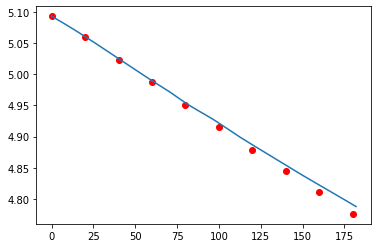

In [24]:
n_Li_acc = [sol.summary_variables["C"] for sol in sol_acc]

fig, ax = plt.subplots()
ax.plot(cycle_nums, n_Li_acc, "ro")
ax.plot(spm_sol_100.summary_variables["C"])
# for k, sol in enumerate(sol_acc):
#     print(sol.summary_variables["n_Li"])
#     print(spm_sol_100.summary_variables["n_Li"][k * n_cycles_step])

2021-02-27 00:44:18,913 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2021-02-27 00:44:18,914 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


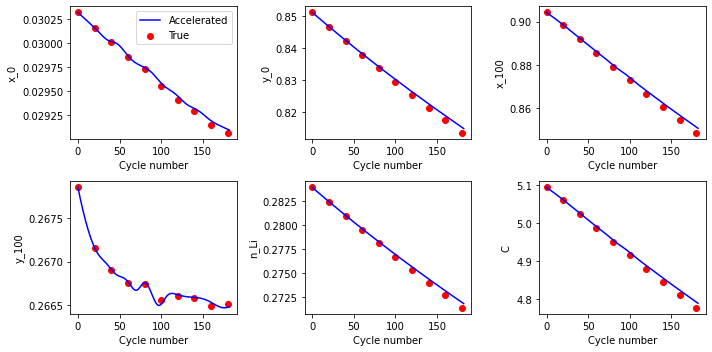

In [25]:
n_Li_acc = [sol.summary_variables["C"] for sol in sol_acc]
esoh_vars = ["x_0", "y_0", "x_100", "y_100", "n_Li", "C"]

fig, axes = plt.subplots(2,3,figsize=(10,5))
for k, name in enumerate(esoh_vars):
    ax = axes.flat[k]
    ax.scatter(cycle_nums,[sol.summary_variables[name] for sol in sol_acc],color="r")
    ax.plot(spm_sol_100.summary_variables[name],"b-")
    ax.set_ylabel(name)
    ax.set_xlabel("Cycle number")
    
axes.flat[0].legend(["Accelerated", "True"])
fig.tight_layout()
fig.savefig(OUTPUT_DIR + "accelerated_sims.eps", dpi=1000)